# Capstone Unsupervised machine learning

# Customer Segmentation for E-commerce Personalization

In this project, you will use `K-means` clustering and `PCA` to perform `customer segmentation` based on their purchasing `behavior` in an e-commerce dataset. 

The `goal` is to identify distinct `groups of customers` with `similar preferences` and `behaviors`, enabling personalized marketing strategies and recommendations. 

`Dataset`: Online Retail Dataset from the UCI Machine Learning Repository Dataset Link: https://archive.ics.uci.edu/ml/datasets/online+retail 

`Steps`: 

+ `Data Preparation`: 
    - `Download` the Online Retail Dataset and preprocess it as needed. `Handle missing values`, `clean the data`, and 
    - `transform` it into a suitable format for analysis. 

+ `Feature Engineering`: 
    - `Extract` relevant features from the dataset that capture customer behavior, such as `purchase history`, `order frequency`, `total spending`, etc. 
    - `Calculate additional metrics` if necessary, such as `recency of purchase` or `average basket size`. 

+ `Dimensionality Reduction with PCA`: 
    - `Apply PCA` to reduce the dimensionality of the feature space while retaining the most informative features. 
    - This step aims to `capture the underlying patterns and structure` in the data. 

+ `Determining Optimal Number of Clusters`: 
    - Use the `elbow method` or `silhouette analysis` to determine the optimal number of clusters for K-means. 
    - Experiment with `different values of K` and `evaluate` the clustering `results`. 

+ `K-means Clustering`: 
    - `Perform K-means clustering` on the reduced feature space. 
    - `Assign each customer` to a cluster `based` on their `feature values`. 
    - `Analyze the resulting` clusters and interpret the characteristics of each segment. 

+ `Cluster Profiling`: 
    - Profile each cluster by `calculating` cluster-specific metrics, such as `average spending`, `purchase frequency`, or `popular product categories`. 
    - `Identify` the key `characteristics and behaviors` that distinguish each cluster. 

+ `Visualization`: 
    - `Visualize` the clusters and their `separation using scatter plots` or other suitable techniques. 
    - `Plot` the clusters `based on the reduced feature space` to understand the distribution and overlap of customers. 
    
+ `Evaluation`: 
    - `Evaluate` the quality of the clustering results using appropriate metrics such as `silhouette score` or `within-cluster sum of squares (WCSS)`. 
    - `Assess` the `cohesion` and `separation` of the clusters to `determine` the `effectiveness` of the `segmentation`. 

+ `Personalization and Recommendations`: 
    - Based on the identified customer segments, develop `personalized marketing strategies` and `recommendations`. 
    - `Tailor promotions`, `product suggestions`, or `communication channels` for each cluster to enhance customer engagement and satisfaction. 

+ `Interpretation and Insights`: 
    - `Interpret the results` and `provide insights` about the different customer segments. 
    - `Discuss` the implications for the e-commerce business, such as `targeted marketing`, `customer retention`, or `inventory management`. 

+ Remember to adhere to ethical guidelines and data privacy regulations while working with customer data.

# Define Project Objectives

The `goal` is to identify distinct `groups of customers` with `similar preferences` and `behaviors`, enabling personalized marketing strategies and recommendations. 

# Data Preparation

`Download` the Online Retail Dataset

In [107]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


+ InvoiceNo
    - a `6-digit` integral number `uniquely` assigned to each `transaction`. 
    - If this `code starts` with letter '`c`', it indicates a `cancellation`

+ StockCode
     - a `5-digit` integral number `uniquely` assigned to each distinct `product`

+ Description
    - `product name`

+ Quantity
    - the `quantities` of each `product` (item) per `transaction`

+ InvoiceDate
    - the `day` and `time` when each `transaction` was generated

+ UnitPrice
    - `product price per unit`

+ CustomerID
    - a `5-digit` integral number `uniquely` assigned to each `customer`

+ Country
    - the `name` of the `country` where each `customer` resides

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


`Handle missing values` and `clean the data`

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

we have `missing values`!!

In [6]:
df.shape

(541909, 8)

we have `541,909 rows` and `8 cols`

drop missing values

In [7]:
df = df.dropna()
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape

(406829, 8)

we have `406,829 rows` and `8 cols`

`transform` it into a suitable format for analysis. 

In [9]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

column `InvoiceDate` is datatime so extract some features from the it

In [10]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8


# Feature Engineering

+ `Extract` relevant features from the dataset that capture customer behavior, such as `purchase history`, `order frequency`, `total spending`, etc. 

purchase history per customer

In [11]:
df['PurchaseHistory'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35


we group `CustomerID` and select `InvoiceNo` then apply aggregation function `nunique` to column `InvoiceNo`

result is a Series for each `CustomerID` wi;l calculate `number of unique invoices` for each row.

we used `transform` function to apply an aggregation function `nunique` on `InvoiceNo` and then `broadcast` the aggregated `values back` to each corresponding `row` in dataset.

assin result in `PurchaseHistory` is number of unique invoices for each customer.

order frequency per customer

In [12]:
df['OrderFrequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique') / df.groupby('CustomerID')['InvoiceDate'].transform('nunique')
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35,1.029412


we will group `CustomerID` and select `InvoiceNo` then apply aggregation function `nunique` to column `InvoiceNo`, 

result is a Series for each `CustomerID` will calculate `number of unique invoices` for each row.

and group `CustomerID` again and select `InvoiceDate` then apply aggregation function `nunique` to column `InvoiceDate`, 

result is a Series for each `CustomerID` will calculate `number of unique invoice dates` for each row.

""AND `DIVIDE` THEM EACH OTHER"" to get `OrderFrequency` is `ratio` of the `number of unique invoices` to the `number of unique invoice dates` for customer places an order.

total spending per customer

In [13]:
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35,1.029412,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,35,1.029412,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,35,1.029412,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,35,1.029412,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,35,1.029412,20.34


we multiplie the `Quantity` column with the `UnitPrice` column which is ` quantity of items purchased by their unit price` and store result `TotalSpending`

+ `Calculate additional metrics` if necessary, such as `recency of purchase` or `average basket size`. 

recency of purchase per customer

In [14]:
max_date = df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

find maximum (`latest`) date

In [15]:
max_dates_series = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
max_dates_series.head(1)

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00


find `series` with maximum or `latest invoice date` for `each customer`

In [16]:
df['Recency'] = (max_date - max_dates_series['InvoiceDate']).dt.days
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35,1.029412,15.3,325.0


In [17]:
df.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Year                    0
Month                   0
Day                     0
Hour                    0
PurchaseHistory         0
OrderFrequency          0
TotalSpending           0
Recency            403644
dtype: int64

calculate the time difference between the `maximum date` and `latest invoice date for each customer`,  

extract the `number of days` from the resulting 

assign result in `Recency` is recency of each customer's `last purchase` in terms of the `number of days`.

customers with value `NaN` means that there are `no purchase records` for that specific customer in the dataset.

basket size for each transaction per customer

In [18]:
df['BasketSize'] = df.groupby(['CustomerID', 'InvoiceNo'])['Quantity'].transform('sum')
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,Recency,BasketSize
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35,1.029412,15.3,325.0,40


we will group `CustomerID` and group `InvoiceNo` and select `Quantity` then apply aggregation function `sum` to column `Quantity`, 

result is a Series for each row with `CustomerID` and `InvoiceNo` will calculate `total quantity of items in transaction` for each customer

average basket size per customer

In [19]:
df['AverageBasketSize'] = df.groupby('CustomerID')['BasketSize'].transform('mean')
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,Recency,BasketSize,AverageBasketSize
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35,1.029412,15.3,325.0,40,77.759615


we will group `CustomerID` and select `BasketSize` then apply aggregation function `mean` to column `BasketSize`, 

result is a Series for each row with `CustomerID` will calculate `average basket size` for each customer

# Dimensionality Reduction with PCA

`Apply PCA` to reduce the dimensionality of the feature space while retaining the most informative features. 

This step aims to `capture the underlying patterns and structure` in the data. 

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Select relevant features for PCA

In [21]:
df.isna().sum()

InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID                0
Country                   0
Year                      0
Month                     0
Day                       0
Hour                      0
PurchaseHistory           0
OrderFrequency            0
TotalSpending             0
Recency              403644
BasketSize                0
AverageBasketSize         0
dtype: int64

In [22]:
df.shape

(406829, 18)

we have problem in column `Recency` missing values with `404318 rows` and we can't drop these rows in dataset because all rows in dataset is `406829`! so we drop only this column.

and drop column `InvoiceNo`, column `StockCode`, column `Description`, column `InvoiceDate` and column `CustomerID`

In [23]:
features_pca = df.drop(["Recency", "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "BasketSize"], axis=1)
features_pca.head(1)

,Quantity,UnitPrice,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,AverageBasketSize
0,6,2.55,United Kingdom,2010,12,1,8,35,1.029412,15.3,77.759615


In [24]:
features_pca.shape

(406829, 11)

In [25]:
features_pca.dtypes

Quantity               int64
UnitPrice            float64
Country               object
Year                   int32
Month                  int32
Day                    int32
Hour                   int32
PurchaseHistory        int64
OrderFrequency       float64
TotalSpending        float64
AverageBasketSize    float64
dtype: object

we should encode column `Country`

In [26]:
features_pca['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

use one-hot encoding

In [27]:
features_pca = pd.get_dummies(features_pca, columns=['Country'], drop_first=True, dtype=int)
features_pca.head()

,Quantity,UnitPrice,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,AverageBasketSize,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,2010,12,1,8,35,1.029412,15.30,77.759615,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,2010,12,1,8,35,1.029412,20.34,77.759615,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,2010,12,1,8,35,1.029412,22.00,77.759615,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,2010,12,1,8,35,1.029412,20.34,77.759615,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,2010,12,1,8,35,1.029412,20.34,77.759615,...,0,0,0,0,0,0,0,0,1,0


make normalization for features

In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_pca)
scaled_features.shape

(406829, 46)

Apply PCA

In [29]:
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)
pca_features.shape

(406829, 10)

In [30]:
pca.components_

array([[-1.41524631e-01,  3.53492954e-03, -4.62123944e-02,
         4.60999363e-02, -2.33803204e-02,  1.20000956e-01,
        -2.68629198e-01, -3.84158189e-03, -1.39237065e-01,
        -3.82168477e-01, -3.13140006e-02, -6.32091222e-03,
        -9.56606580e-02, -1.23990260e-02, -2.65311344e-02,
        -6.18482815e-02, -4.54476531e-02, -1.87934404e-02,
        -3.40283104e-02, -3.32099531e-01, -2.37808996e-02,
        -5.70632704e-02, -1.90378497e-01, -2.03287352e-01,
        -2.43432297e-02, -2.51560223e-02, -5.52716478e-02,
        -5.09509502e-02, -5.04612240e-02, -1.91492799e-02,
        -1.14381734e-02, -2.00089954e-02, -3.13988490e-01,
        -8.70412097e-02, -4.32718575e-02, -7.85669328e-02,
        -1.87816135e-02, -3.70399947e-03, -4.79390095e-02,
        -9.87165087e-02, -7.13901131e-02, -1.11060593e-01,
        -2.53541607e-02, -1.24456928e-02,  5.97261222e-01,
        -3.36450727e-02],
       [ 6.81847543e-01, -1.04115060e-01, -1.13450287e-02,
         4.24133596e-03, -8.86

In [31]:
pca.explained_variance_ratio_

array([0.047065  , 0.04164314, 0.03242814, 0.03091698, 0.0303786 ,
       0.02264147, 0.02204257, 0.02189697, 0.02185592, 0.0218269 ])

we have bad `ratio` use another features, drop column `Country` and run pca again

In [32]:
features_pca = df.drop(["Recency", "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "BasketSize", "Country"], axis=1)
features_pca.shape

(406829, 10)

In [33]:
scaled_features = StandardScaler().fit_transform(features_pca)
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)
pca_features.shape

(406829, 10)

In [34]:
pca.components_

array([[-6.98472803e-01,  9.86477280e-02, -6.41267509e-03,
         6.70709010e-03, -2.16024190e-03,  1.60049282e-02,
        -1.43242451e-02, -8.39632355e-03, -7.04929880e-01,
        -6.96822845e-02],
       [ 8.90554057e-03, -6.35872666e-03, -6.44908200e-01,
         6.31303586e-01, -4.05919158e-01,  1.14217030e-01,
         2.11349443e-02,  5.53673695e-02,  1.11416079e-02,
        -6.30649946e-02],
       [-2.84931070e-02,  5.91379040e-02,  5.86448884e-02,
         1.14744379e-01,  1.13917791e-01,  8.01508966e-02,
         3.92557205e-01,  6.35083210e-01, -3.95761781e-02,
         6.32997480e-01],
       [-1.75263884e-02,  3.16802923e-02, -8.23756957e-02,
        -9.73955572e-02, -3.05143535e-01, -7.60103297e-01,
         3.56703662e-01, -3.26557352e-01, -2.54927609e-02,
         2.77526301e-01],
       [ 1.40383167e-01,  9.85451154e-01,  1.41710207e-03,
        -1.80929210e-02, -4.08292163e-02,  1.46865944e-02,
        -8.08411423e-02, -7.67781545e-03,  2.70265011e-03,
        -1.

In [35]:
features_pca.head()

,Quantity,UnitPrice,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,AverageBasketSize
0,6,2.55,2010,12,1,8,35,1.029412,15.30,77.759615
1,6,3.39,2010,12,1,8,35,1.029412,20.34,77.759615
2,8,2.75,2010,12,1,8,35,1.029412,22.00,77.759615
3,6,3.39,2010,12,1,8,35,1.029412,20.34,77.759615
4,6,3.39,2010,12,1,8,35,1.029412,20.34,77.759615


In [36]:
pca.explained_variance_ratio_

array([0.19299057, 0.14451667, 0.12051235, 0.10568403, 0.09993553,
       0.09568735, 0.08988323, 0.07959624, 0.06370101, 0.00749302])

i think maybe make more performance when change features again

drop `Year`, `Month`, `Day`, `Hour`.

In [37]:
features_pca = df.drop(["Recency", "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "BasketSize", "Country", "Year", "Month", "Day", "Hour"], axis=1)
features_pca.shape

(406829, 6)

In [38]:
scaled_features = StandardScaler().fit_transform(features_pca)
pca = PCA(n_components=6)
pca_features = pca.fit_transform(scaled_features)
pca_features.shape

(406829, 6)

In [39]:
pca.components_

array([[-0.69861817,  0.09868725, -0.01433724, -0.00978658, -0.70509818,
        -0.06876558],
       [-0.0305519 ,  0.06637569,  0.42398768,  0.6005926 , -0.04298824,
         0.67255917],
       [ 0.14060459,  0.98402267, -0.10561156,  0.00387004,  0.00317991,
        -0.0274014 ],
       [ 0.0113829 ,  0.08903069,  0.84501629, -0.52177124, -0.00143066,
        -0.0751276 ],
       [ 0.02343952,  0.0068101 ,  0.30792973,  0.60573723,  0.03449288,
        -0.73244532],
       [ 0.70039318, -0.0978858 ,  0.00135693,  0.00386797, -0.7069559 ,
        -0.00801953]])

In [40]:
features_pca.head(1)

,Quantity,UnitPrice,PurchaseHistory,OrderFrequency,TotalSpending,AverageBasketSize
0,6,2.55,35,1.029412,15.3,77.759615


In [41]:
pca.explained_variance_ratio_

array([0.32160647, 0.19897484, 0.16652419, 0.16228112, 0.1381248 ,
       0.01248859])

It's great!

Now we can use first 5 features with ratio `98.75%` save info in data.

In [42]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5'], dtype=object)

remove last feature

In [43]:
columns_pca = pca.get_feature_names_out()[:-1]

In [44]:
data_pca = pca_features[:, :-1]

In [45]:
pca_df = pd.DataFrame(data=data_pca, columns=columns_pca)
pca_df.head()

,pca0,pca1,pca2,pca3,pca4
0,0.053589,-0.144667,-0.029441,0.183132,0.529500
1,0.046474,-0.144370,-0.017479,0.184194,0.529989
2,0.037207,-0.145395,-0.025421,0.183458,0.530249
3,0.046474,-0.144370,-0.017479,0.184194,0.529989
4,0.046474,-0.144370,-0.017479,0.184194,0.529989


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py

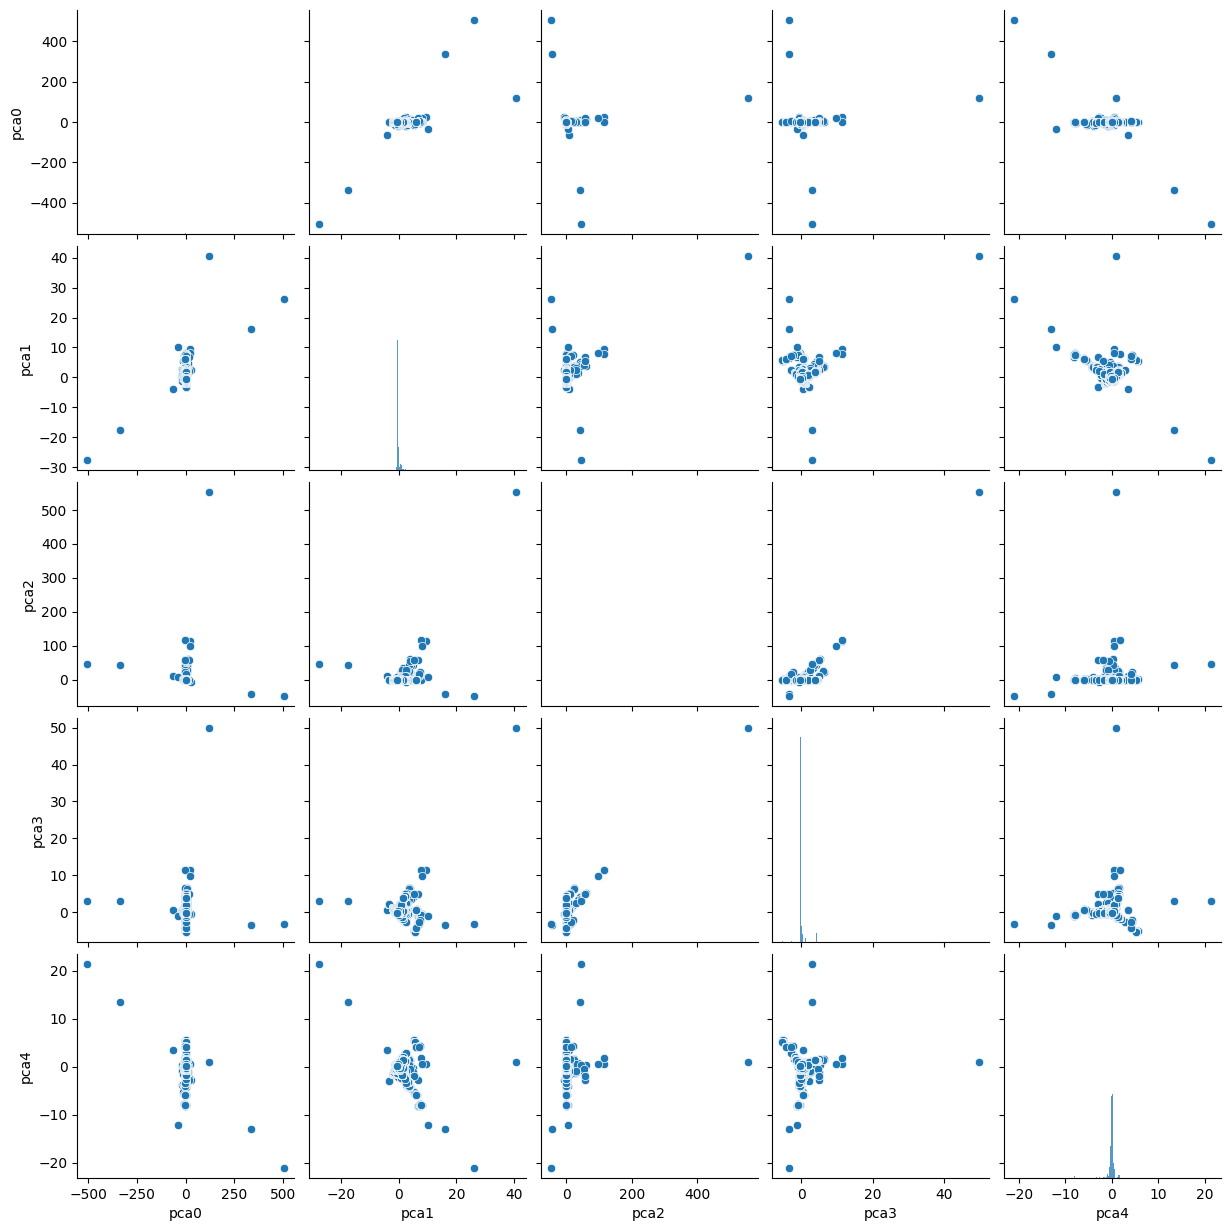

In [47]:
sns.pairplot(pca_df)

i think graphs not good! :(

maybe try again with change features and `plot` again!

and i think maybe should be handeld `outliers`!

drop `Quantity` and `UnitPrice` because we already use `TotalSpending`

In [48]:
features_pca = df.drop(["Recency", "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "BasketSize", "Country", "Year", "Month", "Day", "Hour", "Quantity", "UnitPrice"], axis=1)
features_pca.head()

,PurchaseHistory,OrderFrequency,TotalSpending,AverageBasketSize
0,35,1.029412,15.30,77.759615
1,35,1.029412,20.34,77.759615
2,35,1.029412,22.00,77.759615
3,35,1.029412,20.34,77.759615
4,35,1.029412,20.34,77.759615


In [49]:
features_pca.shape

(406829, 4)

handeled outliers

In [103]:
def drop_outliers(dataset, columns=None, threshold=1.5):
    """
    Drop outliers from the specified columns in the dataset using the IQR method.

    Parameters:
    - dataset (pd.DataFrame): The input dataset.
    - columns (list or None): List of column names to consider. If None, all numeric columns will be considered.
    - threshold (float): The threshold multiplier for defining outliers. Default is 1.5.

    Returns:
    - pd.DataFrame: A new DataFrame with outliers removed.
    """

    if columns is None:
        numeric_columns = dataset.select_dtypes(include=['number']).columns
    else:
        numeric_columns = columns

    dataset_with_outliers = dataset.copy()

    for col in numeric_columns:
        Q1 = dataset_with_outliers[col].quantile(0.25)
        Q3 = dataset_with_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        dataset_no_outliers = dataset_with_outliers[
            (dataset_with_outliers[col] >= lower_bound) & (dataset_with_outliers[col] <= upper_bound)
        ]

    return dataset_no_outliers

features_pca = drop_outliers(features_pca)
features_pca.shape

(283165, 4)

In [170]:
scaled_features = StandardScaler().fit_transform(features_pca)
pca = PCA(n_components=4)
pca_features = pca.fit_transform(scaled_features)
pca_features.shape

(283165, 4)

In [171]:
pca.components_

array([[-2.55171301e-01, -3.33066907e-16, -6.68534968e-01,
        -6.98533180e-01],
       [ 9.51607360e-01, -1.94289029e-16, -3.01606876e-01,
        -5.89637629e-02],
       [-1.71263073e-01, -5.55111512e-16, -6.79775175e-01,
         7.13144215e-01],
       [-0.00000000e+00, -1.00000000e+00,  6.93889390e-16,
        -3.33066907e-16]])

In [172]:
pca.explained_variance_ratio_

array([3.93296471e-01, 3.30884692e-01, 2.75818837e-01, 1.00819313e-35])

In [173]:
values = np.array([3.93296471e-01, 3.30884692e-01, 2.75818837e-01, 1.00819313e-35])
sum_of_values = np.sum(values)
sum_of_values

0.9999999999999999

It's great!

Now we can use `4 PCAs` with ratio `99%` save more info from data.

In [174]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3'], dtype=object)

In [175]:
pca_df = pd.DataFrame(data=pca_features, columns=pca.get_feature_names_out())
pca_df.head()

,pca0,pca1,pca2,pca3
0,-0.713210,1.168214,0.339300,-6.797946e-18
1,-1.133962,0.978393,-0.088527,2.926507e-15
2,-2.255968,0.472205,-1.229397,-2.854364e-20
3,-1.243046,0.929180,-0.199445,-2.199038e-20
4,-0.703860,1.172432,0.348807,-1.850203e-20


based on step `visualization` after step `kmeans` we will `drop pca3`

In [ ]:
pca_columns = pca.get_feature_names_out()[:-1]

In [ ]:
pca_features= pca_features[:, :-1]

In [ ]:
pca_df = pd.DataFrame(data=pca_features, columns=pca_columns)
pca_df.head()

,pca0,pca1,pca2
0,-0.713210,1.168214,0.339300
1,-1.133962,0.978393,-0.088527
2,-2.255968,0.472205,-1.229397
3,-1.243046,0.929180,-0.199445
4,-0.703860,1.172432,0.348807


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

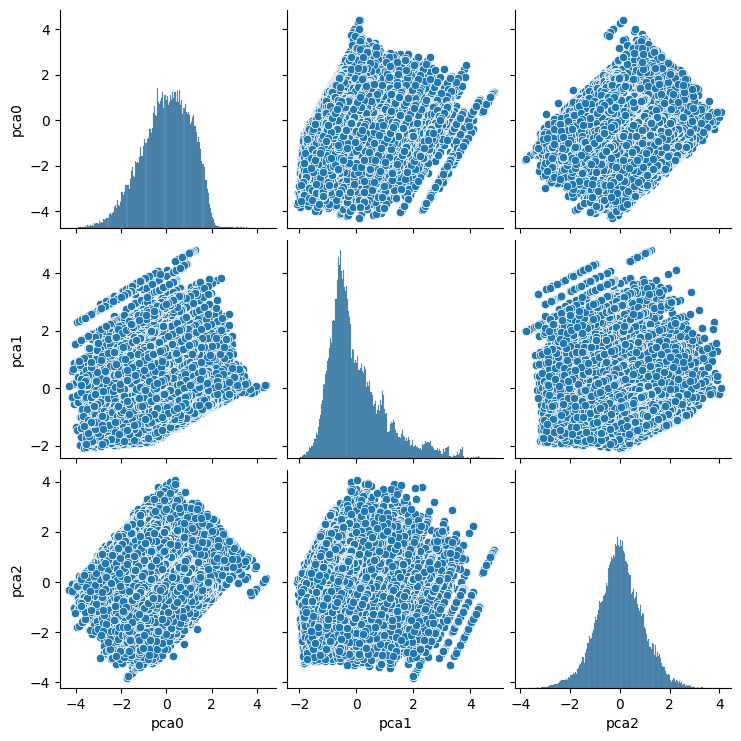

In [169]:
sns.pairplot(pca_df)

# Determining Optimal Number of Clusters

Use the `elbow method` or `silhouette analysis` to determine the optimal number of clusters for K-means. 

Experiment with `different values of K` and `evaluate` the clustering `results`. 

use elbow method

In [122]:
from sklearn.cluster import KMeans

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


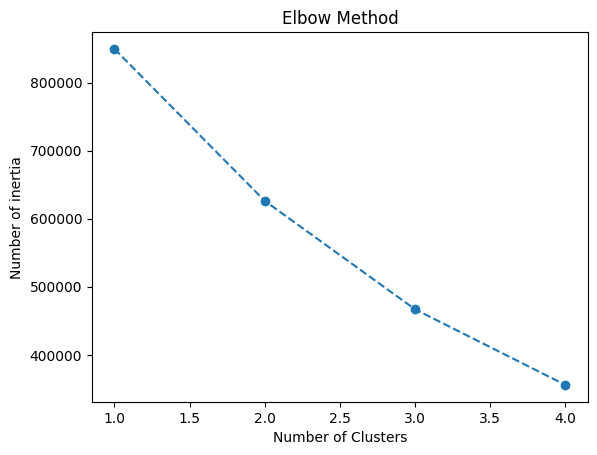

In [137]:
lst_inertias = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    preds = kmeans.fit_predict(pca_features)
    lst_inertias.append(kmeans.inertia_)

plt.plot(range(1, 5), lst_inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of inertia')
plt.show()

we see `best inertia` is when `cluster = 3`

# K-means Clustering

`Perform K-means clustering` on the reduced feature space, `Assign each customer` to a cluster `based` on their `feature values`. 

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')
pca_df['Cluster'] = kmeans.fit_predict(pca_features)
pca_df.head()

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pca0,pca1,pca2,Cluster
0,-0.713210,1.168214,0.339300,0
1,-1.133962,0.978393,-0.088527,0
2,-2.255968,0.472205,-1.229397,0
3,-1.243046,0.929180,-0.199445,0
4,-0.703860,1.172432,0.348807,0


In [ ]:
pca_df['Cluster'].nunique()

2

`Analyze the resulting` clusters and interpret the characteristics of each segment. 

In [151]:
cluster_summary = pca_df.groupby('Cluster').describe().T
cluster_summary

Cluster                 0              1
pca0 count  122028.000000  161137.000000
     mean       -1.013519       0.767531
     std         0.702233       0.577028
     min        -4.295089      -0.467461
     25%        -1.429935       0.295527
     50%        -0.861316       0.716146
     75%        -0.456855       1.198300
     max         0.175192       4.404807
pca1 count  122028.000000  161137.000000
     mean       -0.029396       0.022261
     std         1.042666       0.959142
     min        -2.072289      -1.736450
     25%        -0.812025      -0.606091
     50%        -0.281909      -0.270669
     75%         0.591566       0.385526
     max         4.075114       4.811196
pca2 count  122028.000000  161137.000000
     mean        0.113960      -0.086301
     std         1.100601       0.720753
     min        -3.814757      -3.108241
     25%        -0.608634      -0.552005
     50%         0.126183      -0.071649
     75%         0.899035       0.379003
     max         3.988050       4.082850

# Cluster Profiling

Profile each cluster by `calculating` cluster-specific metrics, such as `average spending`, `purchase frequency`, or `popular product categories`. 

`Identify` the key `characteristics and behaviors` that distinguish each cluster. 

In [143]:
merged_df = pd.concat([df, pca_df], axis=1)
merged_df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,PurchaseHistory,OrderFrequency,TotalSpending,Recency,BasketSize,AverageBasketSize,pca0,pca1,pca2,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,12.0,...,35.0,1.029412,15.3,325.0,40.0,77.759615,-0.71321,1.168214,0.3393,2.0


In [ ]:
merged_df['Cluster'].nunique()

3

In [ ]:
for cluster_label in range(kmeans.n_clusters):    
    
    cluster_data = merged_df[merged_df['Cluster'] == cluster_label]
    
    # Calculate cluster-specific metrics
    avg_spending = cluster_data['TotalSpending'].mean()
    purchase_frequency = cluster_data['OrderFrequency'].mean()
    category_counts = cluster_data['Description'].value_counts().head(1)
    
    # Add other metrics as needed
    print(f"Cluster {cluster_label} Profile:")
    print(f"Average Spending: {avg_spending}")
    print(f"Purchase Frequency: {purchase_frequency}")
    print(f"Popular Product Categories in Cluster {cluster_label}:")
    print(category_counts)
    print("-"*40)

Cluster 0 Profile:
Average Spending: 21.216183933011926
Purchase Frequency: 1.0036816506299446
Popular Product Categories in Cluster 0:
Description
WHITE HANGING HEART T-LIGHT HOLDER    614
Name: count, dtype: int64
----------------------------------------
Cluster 1 Profile:
Average Spending: 20.02593092833923
Purchase Frequency: 1.0048047306043795
Popular Product Categories in Cluster 1:
Description
WHITE HANGING HEART T-LIGHT HOLDER    464
Name: count, dtype: int64
----------------------------------------
Cluster 2 Profile:
Average Spending: 22.552739662065544
Purchase Frequency: 1.0028997449491637
Popular Product Categories in Cluster 2:
Description
WHITE HANGING HEART T-LIGHT HOLDER    230
Name: count, dtype: int64
----------------------------------------
Cluster 3 Profile:
Average Spending: nan
Purchase Frequency: nan
Popular Product Categories in Cluster 3:
Series([], Name: count, dtype: int64)
----------------------------------------


# Visualization

`Visualize` the clusters and their `separation using scatter plots` or other suitable techniques. 

`Plot` the clusters `based on the reduced feature space` to understand the distribution and overlap of customers. 

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

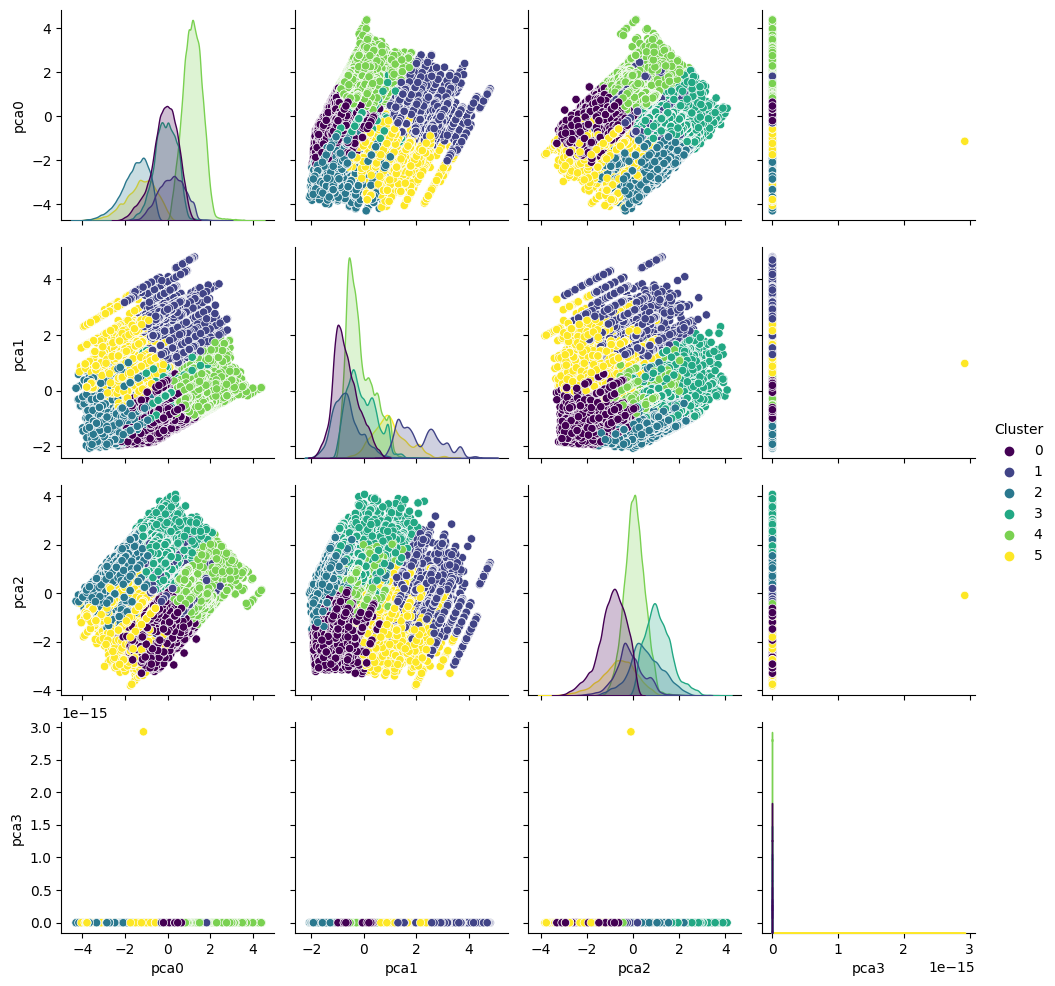

In [118]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')

based on step `visualization` after step `kmeans` we will `drop pca3`

6 Clusters

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

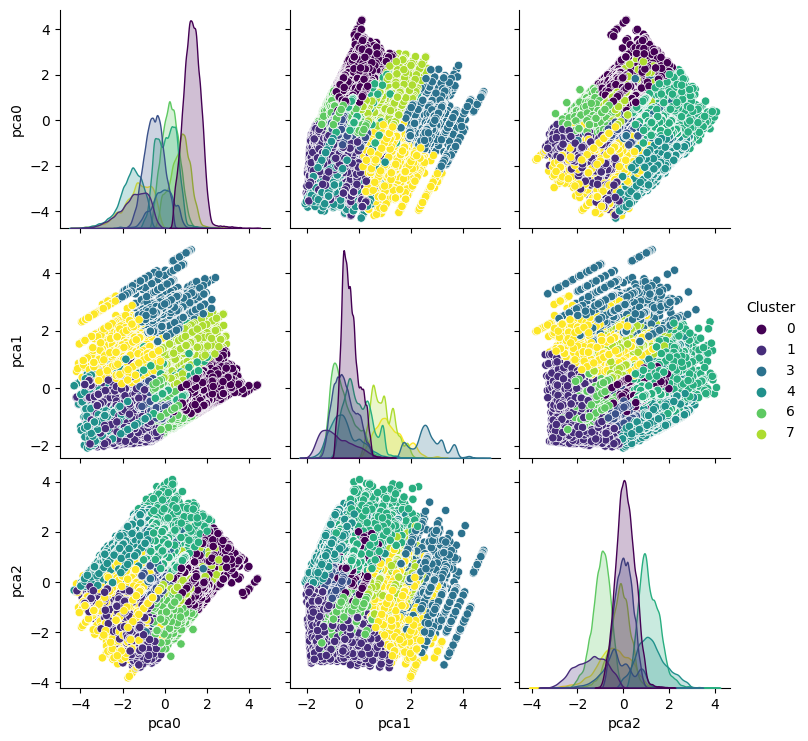

In [127]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')

4 Clusters

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

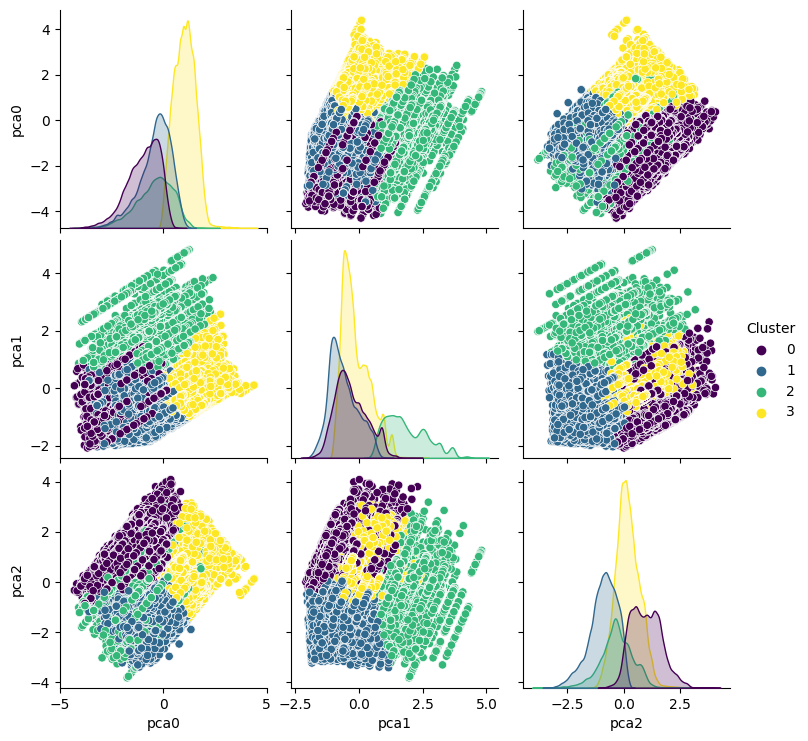

In [131]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')

3 Clusters

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

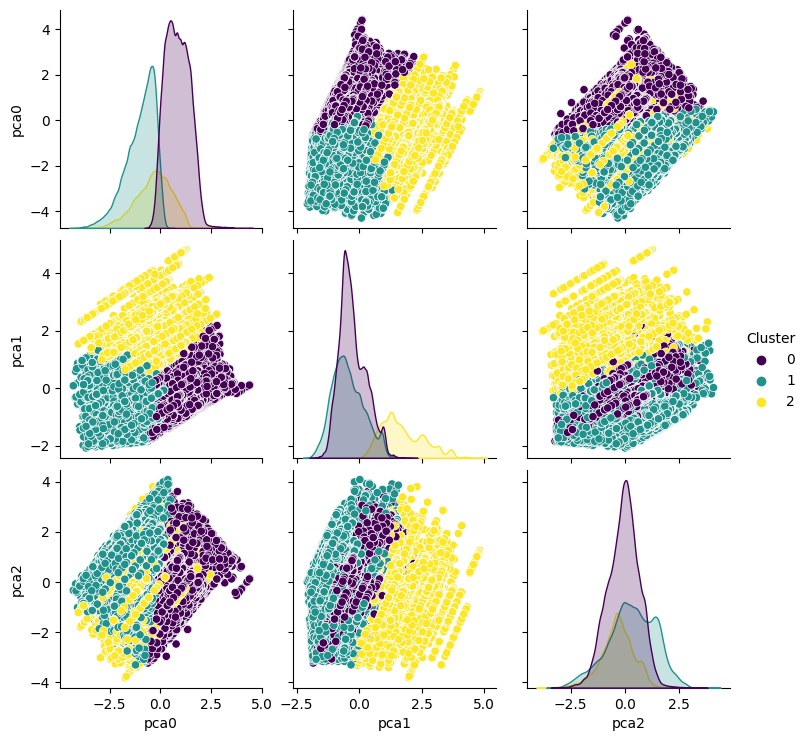

In [135]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')

`3 clusters` is good, but i want to see `2 clusters` too

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

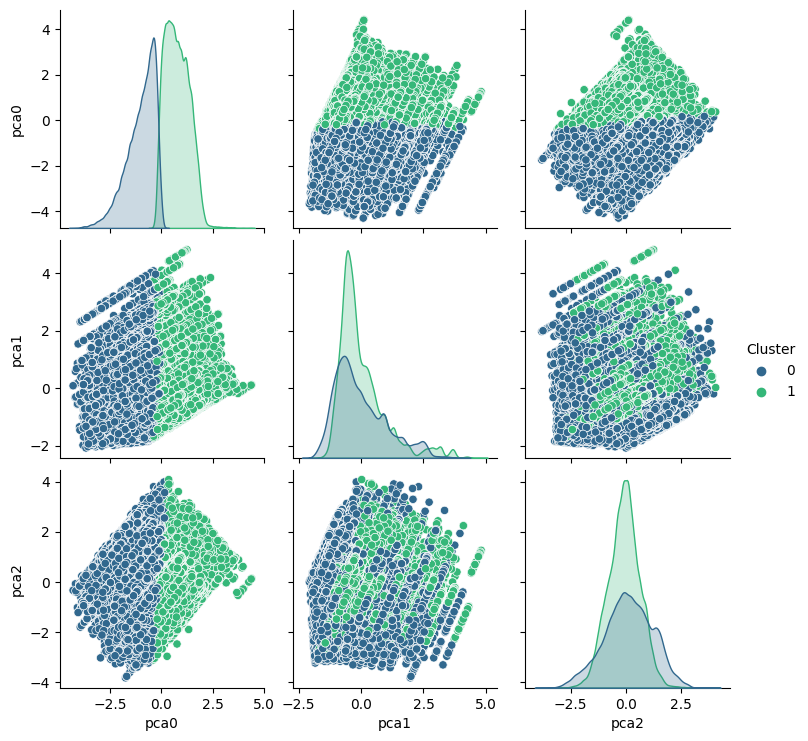

In [152]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')

i think `3 cluster` is the best choice

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='count'>

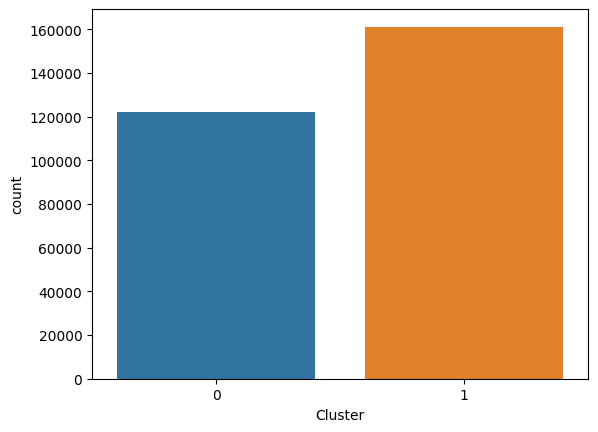

In [153]:
#checking out the count per cluster
sns.countplot(pca_df, x='Cluster')

# Evaluation

`Evaluate` the quality of the clustering results using appropriate metrics such as `silhouette score` or `within-cluster sum of squares (WCSS)`.

`Assess` the `cohesion` and `separation` of the clusters to `determine` the `effectiveness` of the `segmentation`. 

use within-cluster sum of squares (WCSS)

based on last `WCSS` we choice that `3 cluster` are the best number of clusters based on `visualization`

# Personalization and Recommendations

Based on the identified customer segments, develop `personalized marketing strategies` and `recommendations`. 

`Tailor promotions`, `product suggestions`, or `communication channels` for each cluster to enhance customer engagement and satisfaction. 

with `tailor promotions`

Identify the clusters in which customers show `high average spending` and tailor promotions and discounts to appeal to the preferences and behaviors of these high-spending clusters.

with `Product Suggestions`

Analyze the popular product categories within each cluster and provide targeted product suggestions and `recommendations to customers based on the preferences` observed in their respective clusters.

with `Communication Channels`

Understand the preferred communication channels for each cluster. Some clusters might `respond better to email promotions`, while others may `prefer social media or mobile notifications`

# Interpretation and Insights

`Interpret the results` and `provide insights` about the different customer segments. 

`Discuss` the implications for the e-commerce business, such as `targeted marketing`, `customer retention`, or `inventory management`. 

based on insights from my capstone

Targeted Marketing

if a cluster has a `high recency of purchase` but `low average spending`, consider campaigns focused on `increasing` the `average basket size`

Inventory Management

Ensure that `high-demand products` within specific clusters are `well-stocked`, leading to improved customer satisfaction and increased sales.